In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.5,
    random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
clusters = [X_scaled]
labels_div = np.zeros(len(X_scaled))
current_label = 0

In [4]:
def split_cluster(data):
    km=KMeans(n_clusters=2, n_init=10, random_state=42)
    km.fit(data)
    return km.labels_

In [6]:
clusters=[X_scaled]
target_k=3
while len(clusters)<target_k:
    sizes=[len(c) for c in clusters]
    largest_idx=np.argmax(sizes)
    data_to_split=clusters.pop(largest_idx)

    if len(data_to_split)<=2:
        clusters.append(data_to_split)
        break

    labels =split_cluster(data_to_split)

    clusters.append(data_to_split[labels==0])
    clusters.append(data_to_split[labels==1])

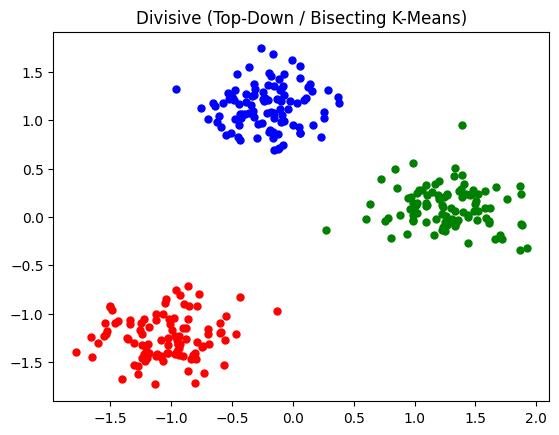

In [7]:
colors = ["red","blue","green","purple","orange"]

for i, c in enumerate(clusters):
    plt.scatter(c[:,0], c[:,1], s=25, color=colors[i])

plt.title("Divisive (Top-Down / Bisecting K-Means)")
plt.show()